# Histograms

In [2]:
import numpy as np 
import pandas as pd
from numpy.random import randn

In [3]:
# Stats
from scipy import stats

In [4]:
# Plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
dataset1 = randn(100)

(array([  5.,   4.,  15.,  16.,  20.,  14.,  12.,  11.,   2.,   1.]),
 array([-2.47262344, -1.96388156, -1.45513968, -0.9463978 , -0.43765591,
         0.07108597,  0.57982785,  1.08856973,  1.59731161,  2.1060535 ,
         2.61479538]),
 <a list of 10 Patch objects>)

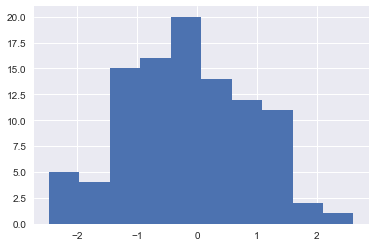

In [7]:
plt.hist(dataset1)

(array([  2.,   5.,  12.,  17.,  13.,   7.,  13.,   4.,   3.,   4.]),
 array([-2.09655298, -1.6430808 , -1.18960863, -0.73613646, -0.28266429,
         0.17080788,  0.62428006,  1.07775223,  1.5312244 ,  1.98469657,
         2.43816874]),
 <a list of 10 Patch objects>)

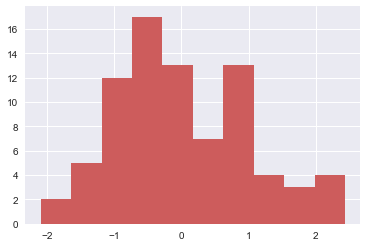

In [9]:
dataset2 = randn(80)
plt.hist(dataset2, color='indianred')

(array([ 0.11026035,  0.        ,  0.16539052,  0.11026035,  0.2205207 ,
         0.4410414 ,  0.55130175,  0.38591122,  0.2205207 ,  0.49617157,
         0.16539052,  0.2205207 ,  0.38591122,  0.33078105,  0.2205207 ,
         0.        ,  0.11026035,  0.05513017,  0.11026035,  0.11026035]),
 array([-2.09655298, -1.86981689, -1.6430808 , -1.41634472, -1.18960863,
        -0.96287255, -0.73613646, -0.50940037, -0.28266429, -0.0559282 ,
         0.17080788,  0.39754397,  0.62428006,  0.85101614,  1.07775223,
         1.30448831,  1.5312244 ,  1.75796049,  1.98469657,  2.21143266,
         2.43816874]),
 <a list of 20 Patch objects>)

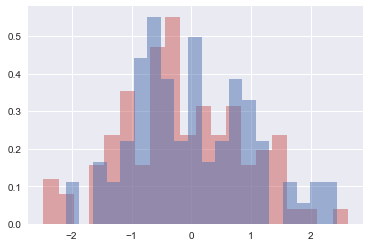

In [10]:
plt.hist(dataset1,normed=True,color='indianred',alpha=0.5,bins=20)
plt.hist(dataset2,normed=True,alpha=0.5,bins=20)

In [14]:
data1 = randn(1000)
data2 = randn(1000)

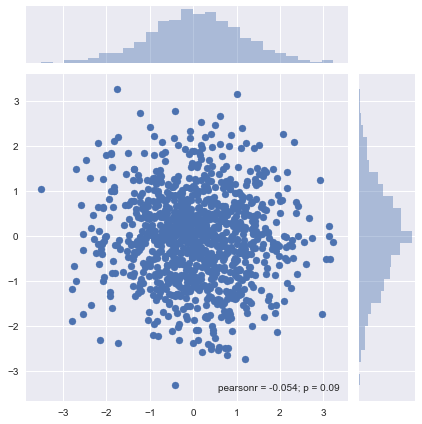

In [15]:
sns.jointplot(data1, data2)

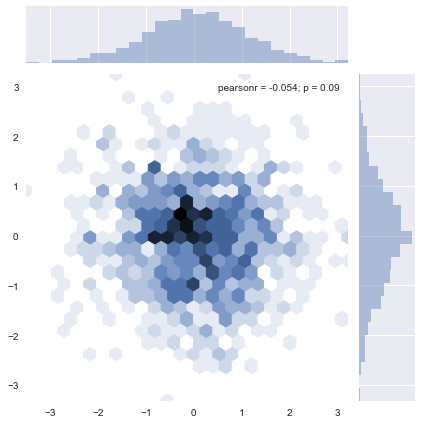

In [16]:
sns.jointplot(data1,data2,kind='hex')

# Kernel density estimation plot

In [17]:
import numpy as np 
import pandas as pd
from numpy.random import randn
# Stats
from scipy import stats
# Plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [18]:
dataset = randn(25)

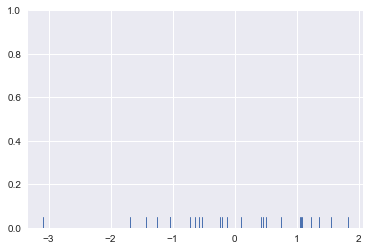

In [20]:
sns.rugplot(dataset)

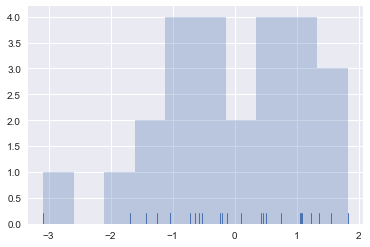

In [21]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

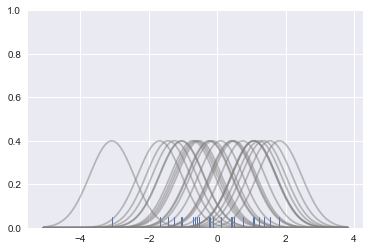

In [23]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)
bandwidth = ((4*dataset.std()**5) / (3*len(dataset)))**0.2
kernel_list = []

for data_point in dataset:
    # Creat a kernel for each point and append it to the kernel list 
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting 
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)

plt.ylim(0,1)

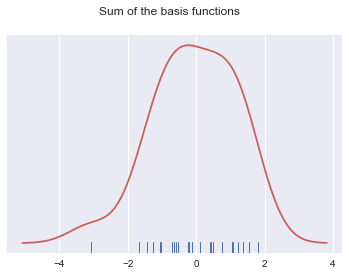

In [26]:
sum_of_kde = np.sum(kernel_list, axis=0)
fig = plt.plot(x_axis, sum_of_kde, color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the basis functions')

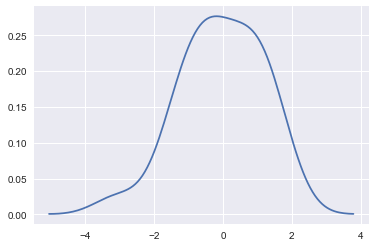

In [27]:
sns.kdeplot(dataset)

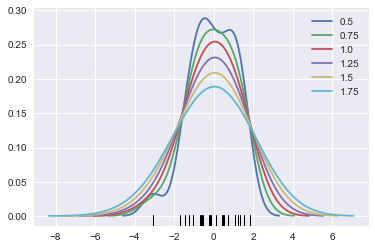

In [30]:
sns.rugplot(dataset, color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset, bw=bw, lw=1.8, label=bw)

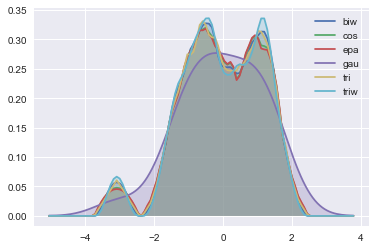

In [34]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern,label=kern,shade=True)

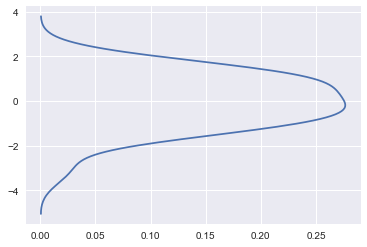

In [35]:
sns.kdeplot(dataset,vertical=True)

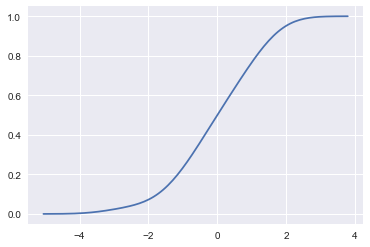

In [36]:
sns.kdeplot(dataset,cumulative=True)

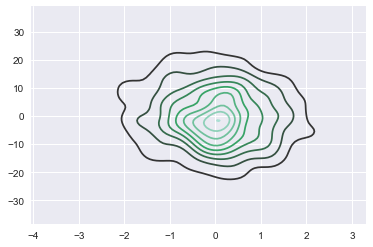

In [40]:
mean = [0,0]

cov = [[1, 0], [0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe)

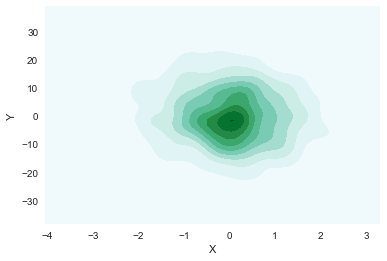

In [43]:
sns.kdeplot(dframe.X, dframe.Y,shade=True)

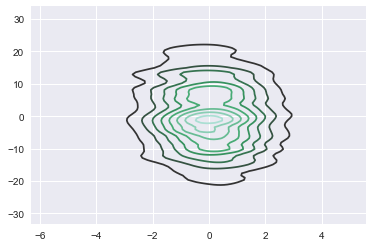

In [44]:
sns.kdeplot(dframe,bw=1)

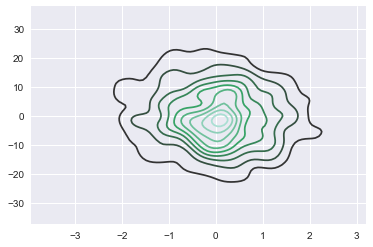

In [45]:
sns.kdeplot(dframe,bw='silverman')

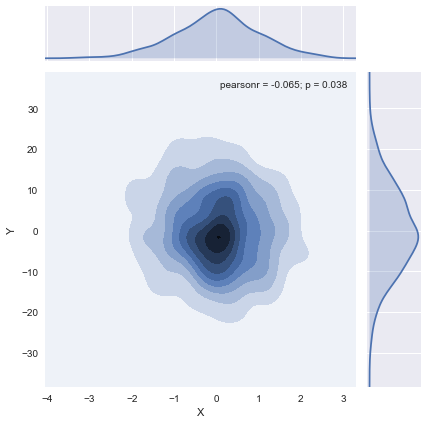

In [46]:
sns.jointplot('X','Y',dframe,kind='kde')

# Combining plot styles

In [47]:
import numpy as np 
import pandas as pd
from numpy.random import randn
# Stats
from scipy import stats
# Plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [48]:
dataset = randn(100)

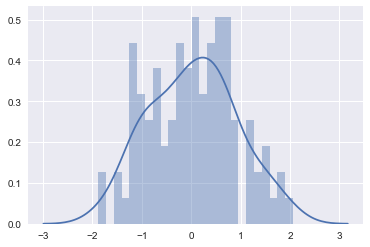

In [49]:
sns.distplot(dataset,bins=25)

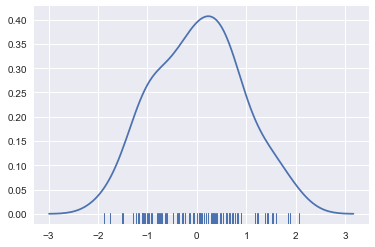

In [51]:
sns.distplot(dataset,bins=25,rug=True,hist=False)

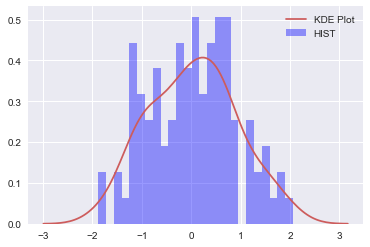

In [52]:
sns.distplot(dataset,bins=25,kde_kws={'color':'indianred','label':'KDE Plot'},
            hist_kws={'color':'blue','label':'HIST'})

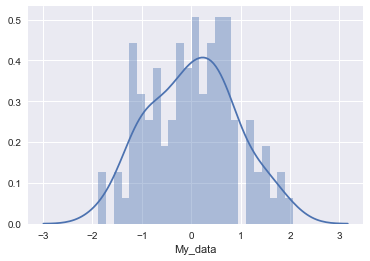

In [55]:
from pandas import Series

ser1 = Series(dataset,name='My_data')
sns.distplot(ser1,bins=25)

# Box and Violin Plots

In [56]:
import numpy as np 
import pandas as pd
from numpy.random import randn
# Stats
from scipy import stats
# Plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [60]:
data1 = randn(100)
data2 = randn(100)

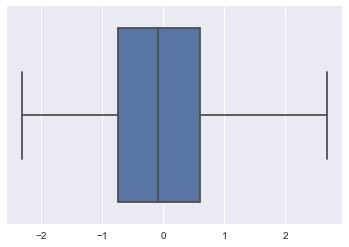

In [63]:
sns.boxplot([data1,data2],whis=np.inf)

In [67]:
# Normal Dist
data1 = stats.norm(0,5).rvs(100)

# Two gamma dist. Concatenated together

In [68]:
data2 = np.concatenate([stats.gamma(5).rvs(50)-1, 
                       -1*stats.gamma(5).rvs(50)])

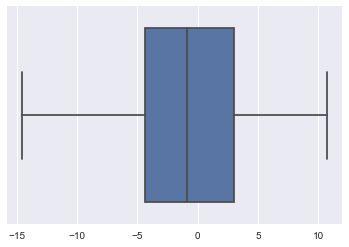

In [70]:
# Box plot both data1 and data2
sns.boxplot([data1,data2],whis=np.inf)

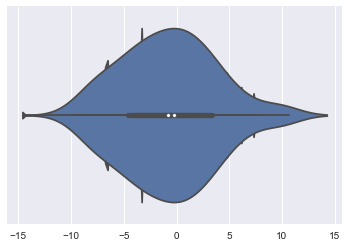

In [78]:
sns.violinplot(data2,bw=0.01,alpha=0.5,color='red')
sns.violinplot(data1,alpha=0.5)

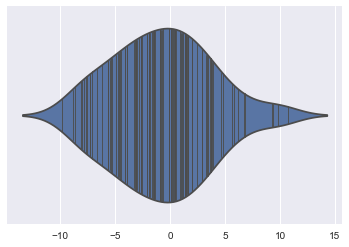

In [79]:
sns.violinplot(data1,inner='stick')

# Regression plots

In [80]:
import numpy as np 
import pandas as pd
from numpy.random import randn
# Stats
from scipy import stats
# Plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [81]:
tips = sns.load_dataset('tips')

In [83]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


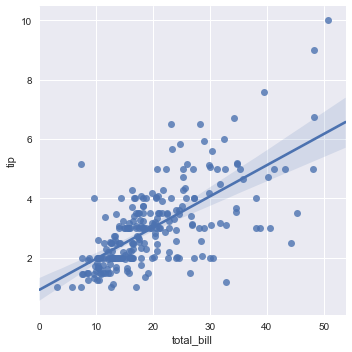

In [84]:
sns.lmplot('total_bill','tip',tips)

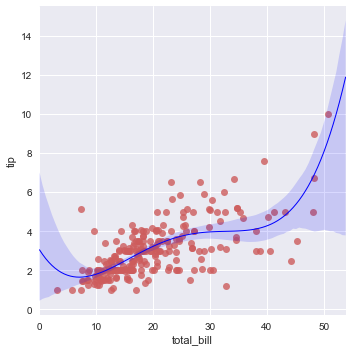

In [87]:
sns.lmplot('total_bill','tip',tips,order=4,
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue'})

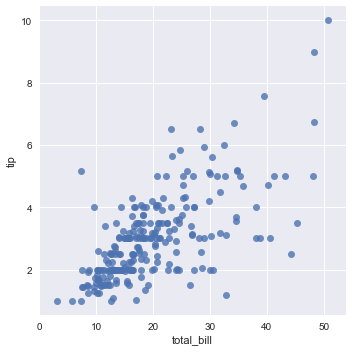

In [88]:
sns.lmplot('total_bill','tip',tips,fit_reg=False)

In [89]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [90]:
tips['tip_pect']=100*(tips['tip']/tips['total_bill'])

In [91]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


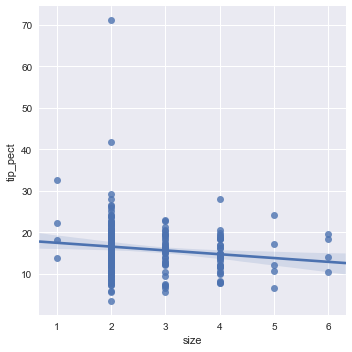

In [92]:
sns.lmplot('size','tip_pect',tips)

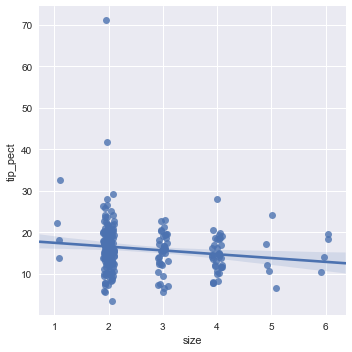

In [93]:
sns.lmplot('size','tip_pect',tips,x_jitter=.1)

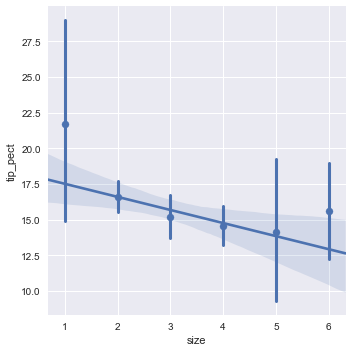

In [94]:
sns.lmplot('size','tip_pect',tips,x_estimator=np.mean)

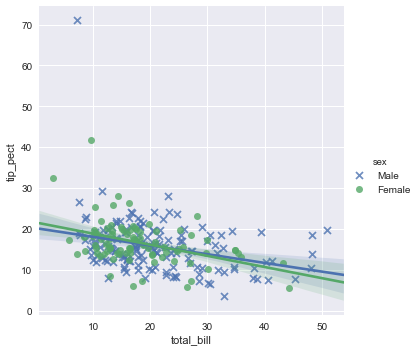

In [95]:
sns.lmplot('total_bill','tip_pect',tips,hue='sex',markers=['x','o'])

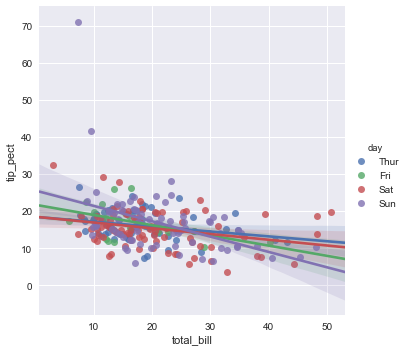

In [96]:
sns.lmplot('total_bill','tip_pect',tips,hue='day')

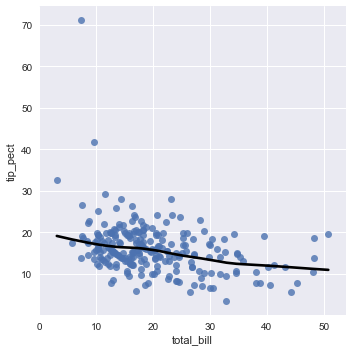

In [97]:
sns.lmplot('total_bill','tip_pect',tips,lowess=True,line_kws={'color':'black'})

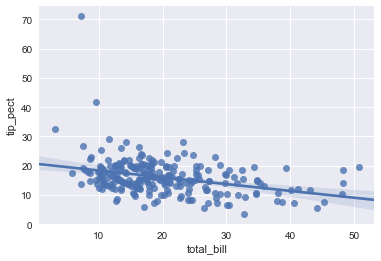

In [98]:
sns.regplot('total_bill','tip_pect',tips)

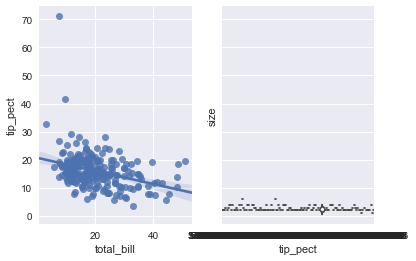

In [102]:
fig, (axis1,axis2) = plt.subplots(1,2,sharey=True)
sns.regplot('total_bill','tip_pect',tips,ax=axis1)
sns.violinplot(tips['tip_pect'],tips['size'],ax=axis2)

# Heatmaps and Clustered Matrices

In [103]:
import numpy as np 
import pandas as pd
from numpy.random import randn
# Stats
from scipy import stats
# Plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [104]:
flight_dframe = sns.load_dataset('flights')

In [105]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [106]:
flight_dframe = flight_dframe.pivot('month','year','passengers')

In [107]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


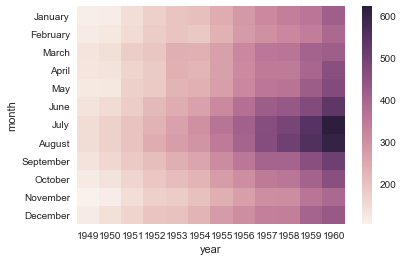

In [109]:
sns.heatmap(flight_dframe)

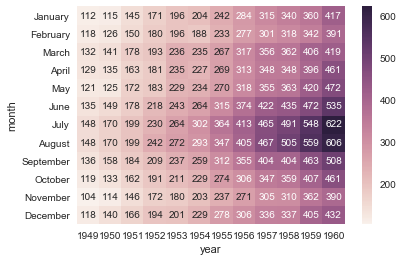

In [111]:
sns.heatmap(flight_dframe,annot=True,fmt='d')

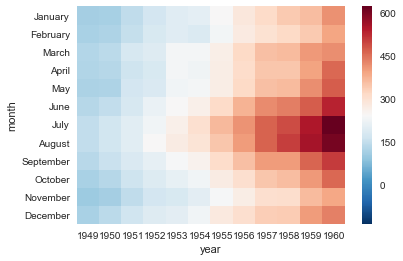

In [113]:
sns.heatmap(flight_dframe,center=flight_dframe.loc['January',1955])

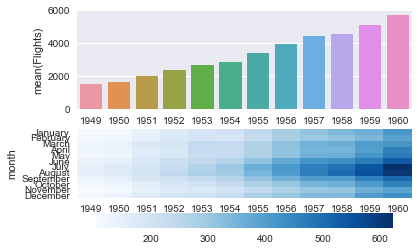

In [116]:
# multiple subplots
f, (axis1,axis2) = plt.subplots(2,1)
yearly_flight = flight_dframe.sum()

years = pd.Series(yearly_flight.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flight.values)
flight = pd.DataFrame(flights)

year_dframe = pd.concat((years, flights),axis=1)
year_dframe.columns = ['Year','Flights']

sns.barplot('Year', y='Flights', data=year_dframe, ax=axis1)
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={'orientation':'horizontal'})

/Users/hefei/anaconda2/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


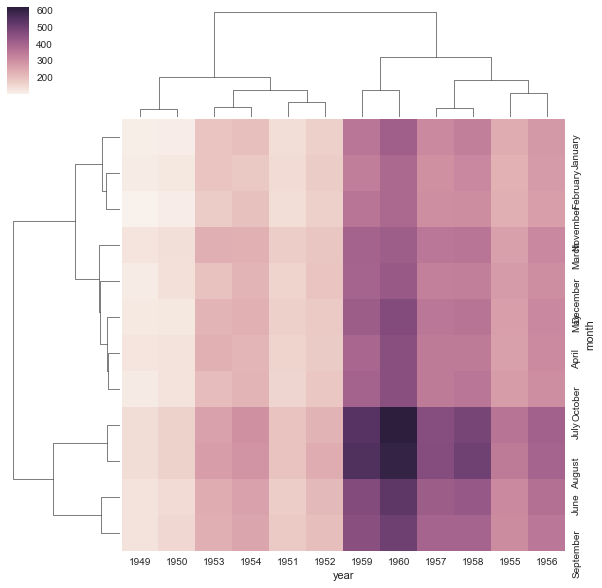

In [117]:
sns.clustermap(flight_dframe)

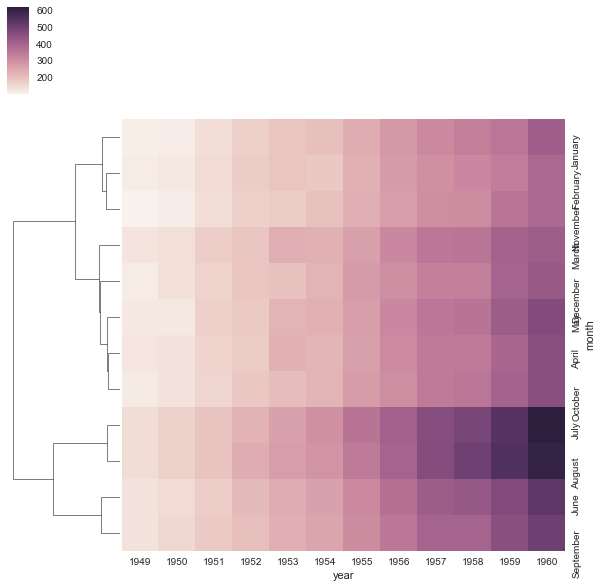

In [118]:
sns.clustermap(flight_dframe,col_cluster=False)

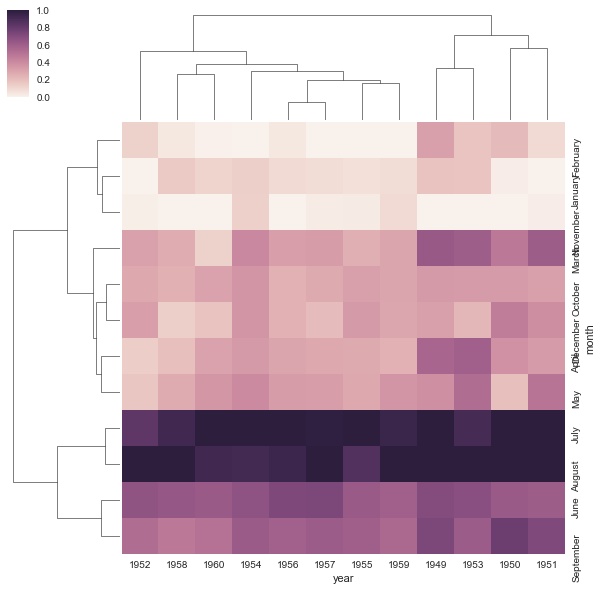

In [119]:
sns.clustermap(flight_dframe,standard_scale=1)

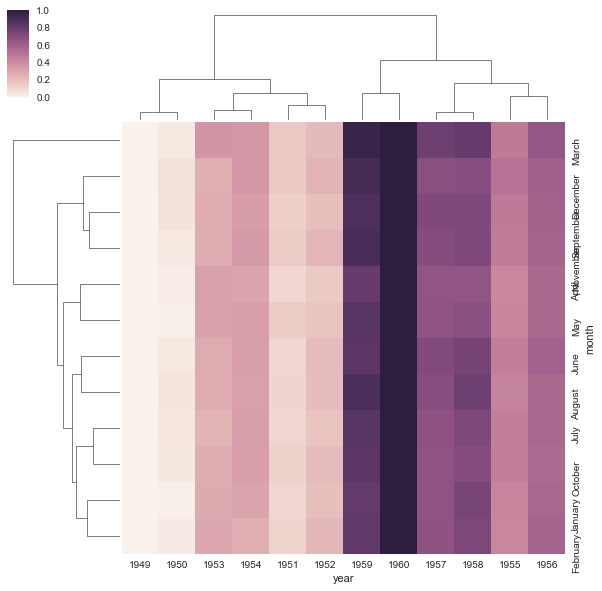

In [120]:
sns.clustermap(flight_dframe,standard_scale=0)

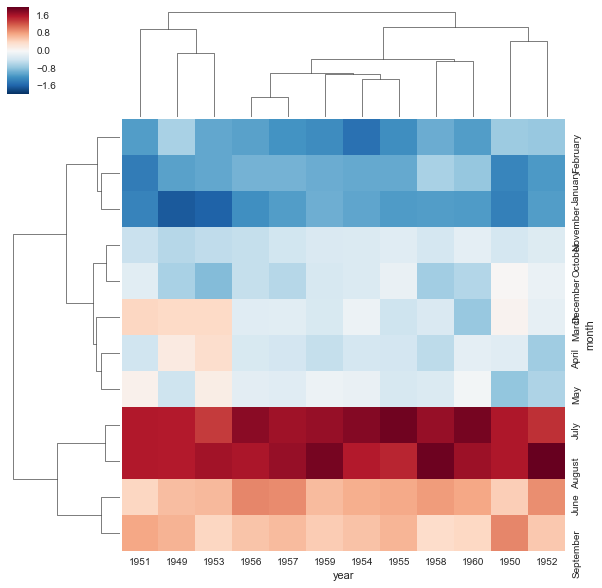

In [121]:
sns.clustermap(flight_dframe,z_score=1)